# Projeto 02: Uso de técnica de Machine Learning não supervisionada na geração de insights para análise de risco de crédito

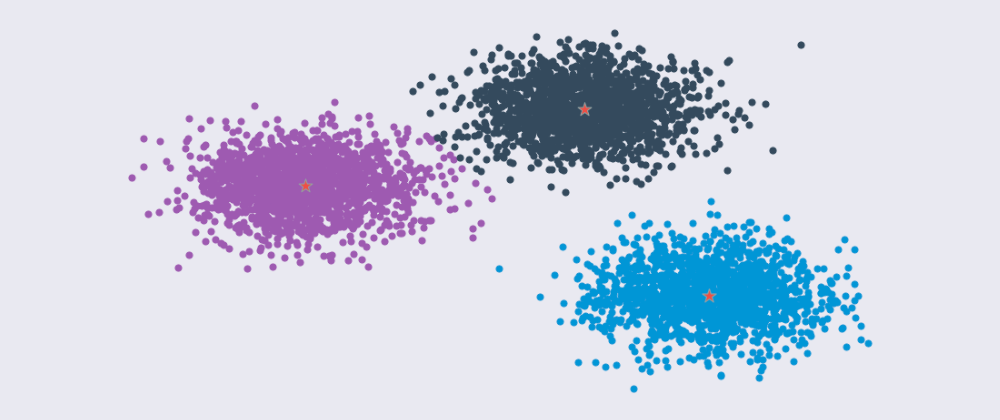

# **Imports**

In [51]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter
from kneed import KneeLocator
import warnings
warnings.simplefilter(action='ignore')
import _pickle as cPickle
import joblib

# **Carrregando os dados**

Utilizou-se a base de  dados de acesso livre “German Credit Data”, fornecido pelo Prof. Dr. Hans Hofmann da 
Universidade de Hamburgo, acessado pelo repositório “Center for Machine Learning and  Intelligent Systems (UCI)”.

Abaixo o link para Download do Dataset e Dados Completos:

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

# **Metodologia CRISP-DM**

O “Cross Industry Standard Process for Data Mining [CRISP-DM]” trata-se de um modelo de processo, com seis etapas Shearer (2000), ilustrado na Figura 1. Está sendo amplamente utilizada para ajudar a planejar e desenvolver projetos de ciência de dados.

  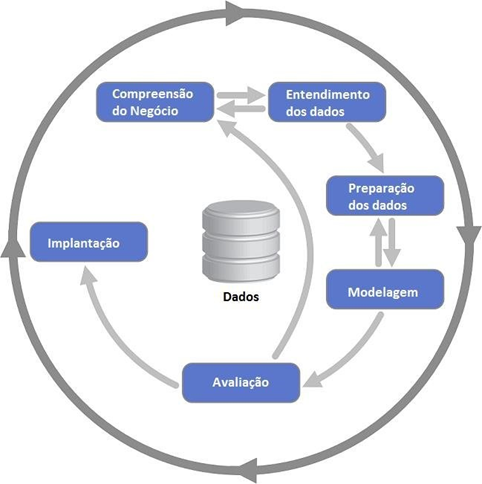
  
  Figura 1: Etapas do Framework CRISP-DM 
  


# **1. Compreensão do Negócio**

### Contextualização do problema de negócio:




### Sobre os dados:
    
O conjunto de dados do Banco Alemão contém informações sobre 1.000 clientes que  solicitaram empréstimo no passado e contém 20 variáveis independentes (3 numéricas e 18  categóricas) relacionadas ao perfil desses solicitantes. A marcação de um cliente ruim para  um crédito já concedido pode variar de acordo com as definições internas do banco, mas  geralmente estão relacionadas ao atraso no pagamento da(s) parcela(s) em um determinado  tempo, no caso do presente estudo não foi disponibilizada a descrição de qual conceito foi  utilizado, contendo apenas o status de risco do crédito, sendo 0 para cliente ruim e 1 para  cliente bom, informação essa que será utilizada como variável resposta do modelo.

Quando um cliente solicita um pedido de crédito, o banco precisa identificar o perfil  desse cliente para decidir se realiza ou não a aprovação desse empréstimo, para não ter  prejuízos no caso de o cliente não pagar o valor concedido, ou seja, se uma empresa oferece  crédito ao seu cliente, sempre existe o risco de que seus clientes não paguem. Assim, a  construção de modelos de risco de crédito é utilizada nessa decisão, pois a partir de  informações dos perfis demográficos e socioeconômicos dos clientes que já solicitaram  empréstimo no passado é possível estimar a probabilidade de inadimplência em empréstimos 
de novos clientes, possibilitando uma melhor qualidade na concessão do empréstimo,  reduzindo a inadimplência e aumentando a receita.

      
        
### Objetivo :
        
 Uso de algoritmo de aprendizagem de máquina do tipo não supervisionada para gerar insights na análise de risco de crédito que poderiam ser utilizados para ajuste e manutenção da política de crédito, como: 
 
 
 - Identificação das características do perfil de clientes em relação aos clusters criados, que em seguida podem ser utilizados para: Realizar adequação do valor de empréstimo, ajuste de taxa de juros, oferta de novos produtos e até mesmo utilizar os clusters como input em modelos preditivos, como uma nova feature.
                
        
### Proposta de solução:


Implementação e avaliação de modelo de aprendizado de máquina do tipo não supervisionado na análise de risco de crédito.
 


### Estrategia Adotada para solução do problema de negócio:


A Estrategia adotada é criar um modelo de aprendizagem de máquina do tipo não supervisionado que possa gerar insights na análise de risco de crédito, para isso a construção do projeto seguiu as etapas do CRISP-DM destacadas abaixo:


* 01. Compreensão dos dados


Já descrita acima.


* 02. Entendimento dos dados

 Analisar o dataset como dimensoes, formatos e dados faltantes. As tarefas realizadas foram: Dimensao dos Dados, Tipo dos Dados nas Colunas, Volume de Dados Faltantes NA's e análise exploratória de dados (EDA) do tipo univariada, bivariada e multivariada.


* 03. Preparação dos Dados

Preparar os dados brutos a fim de adequá-los para etapas de modelagem seguindo o racional da metodologia


* 04. Modelagem


Implementacao do método K-means


* 05. Avaliação

 
 Uso das principais métricas de avaliação de modelos de aprendizado de máquina não supervisionado: Método Elbow e Silhoutte


* 06. Implementação

Descrição dos insights gerados na criação dos modelos

# **2. Entendimento dos dados**

Esta etapa consiste desde a captura dos dados até a identificação de problemas relacionados à qualidade. Nesta fase é também onde se formam hipóteses em cima do que se aprendeu com os dados.

# 2.1. Importação dos Dados

In [2]:
path_data = 'german_credit.csv'

df = pd.read_csv(path_data)
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


# 2.2. Dimensão dos dados

In [3]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1000
Número de atributos do dataset: 21


O objetivo deste etapa é fazer dois tipos de explorações sob os dados:


* Enriquecer o conjunto de dados (dataset) com o levantamento de metadados como dimensão, tipos de atributos e medidas de resumo;

* Explorar analiticamente o dataset com o uso de estatística descritiva (medida de tendência central, variabilidade) e métodos gráficos para se ter ideias de tipos de análises que podem ser realizadas. Como aqui se trata da primeira exploração de dados, a seguir serão definidas algumas propostas de análises com a finalidade de tornar os estudos mais bem direcionados.

# 2.4.1.Identificar o tipo e natureza de cada variável

Dentre os tipos de variáveis que podemos encontrar ao tratar os dados, existem as numéricas, ou quantitativas (por exemplo: peso, comprimento, temperatura), e as categóricas, ou qualitativas (por exemplo: gênero, nacionalidade) conforme apresentado na figura 2.

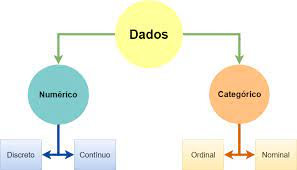

  
  Figura 2: Tipo e Natureza de um atributo/Variável 
  


In [4]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

### Análise e Insights

- A base de dados contém 21 variáveis e 1.000 observações


- Todas as variáveis estão como (int64),entretanto algumas dessas variáveis são de natureza qualitativa, mas foram categorizadas, conforme apresentado acima.


# 2.4.2. Identificando a variável target (alvo) do problema de negócio

O objetivo do estudo é gerar cluterização para identificar perfis de clientes relacionados ao risco de crédito.

In [5]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [6]:
df['Creditability'].value_counts()/df.shape[0]

1    0.7
0    0.3
Name: Creditability, dtype: float64

Text(0.5, 1.0, 'Distribuição da variável resposta')

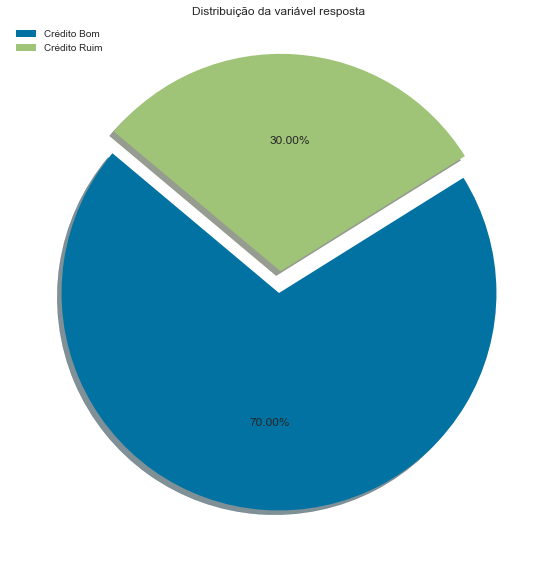

In [7]:
plt.figure(figsize=(10,10))
explode = [0, 0.1]
plt.pie(df['Creditability'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True,startangle=140)
plt.legend(labels=['Crédito Bom','Crédito Ruim'])
plt.title('Distribuição da variável resposta')

### Análise e Insights:

 - Observa-se que existe um desbalanceamento entre as classes da variável resposta, sendo 70% dos solicitantes com bom risco de crédito (Adimplentes) e 30% com risco de crédito ruim (Inadimplentes).
 
 
 - Entretanto, mesmo existindo um desbalanceamento entre as classes da variável resposta, acredito que não seja um problema de evento raro, logo, não irá fazer parte desse estudo nenhuma técnica de balanceamento amostral
 
 - A variável target não será utilizada na construção da solução, será apenas observada nos grupos que serão geradas na metodologia
 

# 2.4.3. Dataset do estudo de clusterização

A técnica do K-means só pode ser criada com variáveis numéricas, pois envolve métodos de cálculo de distância, para isso as variáveis 'Duration of Credit (month)','Credit Amount','Age (years)' serão separadas

In [8]:
df_estudo = df[['Duration of Credit (month)','Credit Amount','Age (years)']] # variáveis 
df_estudo

,Duration of Credit (month),Credit Amount,Age (years)
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


# 2.4.4. Análise Exploratória de dados

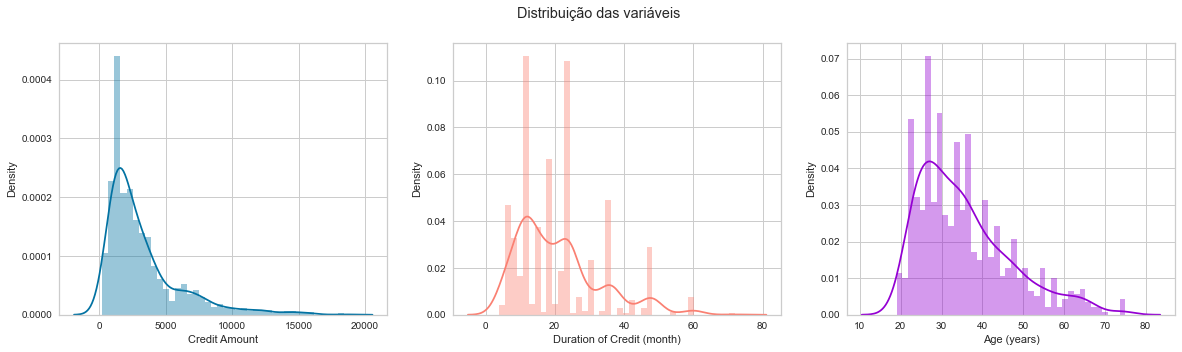

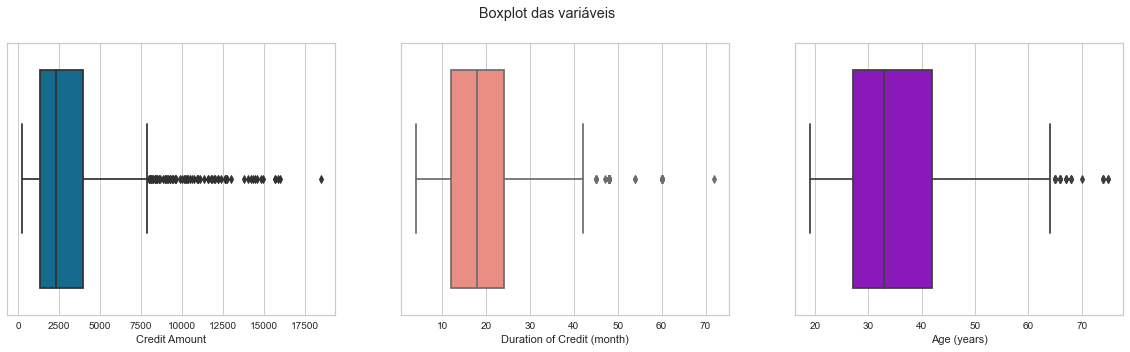

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('Distribuição das variáveis')
sns.distplot(df['Credit Amount'], bins=40, ax=ax[0]);
sns.distplot(df['Duration of Credit (month)'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df['Age (years)'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('Boxplot das variáveis')
sns.boxplot(df['Credit Amount'], ax=ax[0]);
sns.boxplot(df['Duration of Credit (month)'], ax=ax[1], color='salmon');
sns.boxplot(df['Age (years)'], ax=ax[2], color='darkviolet');

## 3. Pré-Processamento dos dados 

Nesta etapa foram utilizadas técnicas de pré-processamento de dados com o objetivo de preparar os dados para aplicação da técnicas de aprendizado de máquina do tipo não supervisionada

Etapas realizadas: 

* Identificação de dados faltantes
* Pré-processamento das variáveis numéricas com uso da função StandardScaler

## 3.1.Identificando dados faltantes

In [10]:
df_estudo.isnull().sum()

Duration of Credit (month)    0
Credit Amount                 0
Age (years)                   0
dtype: int64

### Análise e Insights

 - O dataset não possui dados faltantes

## 3.2. Pré-processamento das variáveis numéricas

In [11]:
columns = ['Duration of Credit (month)','Credit Amount','Age (years)']
df_estudo[columns] = StandardScaler().fit_transform(df_estudo[columns])
X_numericas = df_estudo[columns]
X_numericas

,Duration of Credit (month),Credit Amount,Age (years)
0,-0.240857,-0.787657,-1.281573
1,-0.987573,-0.167384,0.040363
2,-0.738668,-0.861381,-1.105315
3,-0.738668,-0.407341,0.304750
4,-0.738668,-0.389974,0.216621
...,...,...,...
995,0.256953,-0.455191,-1.281573
996,0.256953,-0.343187,0.833525
997,0.008048,3.334852,-0.488411
998,-0.738668,1.133062,1.450428


## 4. Modelagem e Avaliação: Machine Learning - Não Supervisionado ##

No aprendizado não-supervisionado, não existe a informação dos rótulos históricos, ou seja, não temos as da saídas desejadas a serem estimadas e, por este motivo, dizemos que nossos dados são não-rotulados. Assim, o algoritmo não recebe durante o treinamento os resultados esperados, devendo descobrir por si só, por meio da exploração dos dados, os possíveis relacionamentos entre eles. Neste caso, o processo de aprendizado busca identificar regularidades entre os dados a fim de agrupá-los ou organizá-los em função das similaridades que apresentam entre si.

## 4.1.  Algoritmo K-means ##

Um dos mais famosos e utilizados algoritmos de clusterização é o K-Means.

Racional do algoritmo:


1. Primeiro, é necessário definir um ‘K’, que é um número de clusters (ou agrupamentos).


2. Em seguida, defini-se, aleatoriamente, um centroide para cada cluster.


3. No passo seguinte,  calcula-se, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo

4. Segue reposicionando o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.


5. Os dois últimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

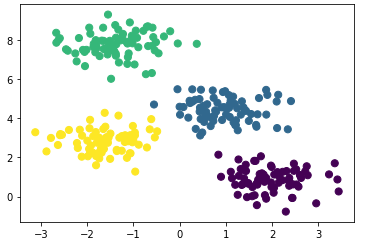

Figura 1: Algoritmo K-means

## 5. Avaliação de desempenho 

Mas, como escolher o número correto de clusters? A resposta para essa pergunta é bastante subjetiva, entretanto, existem muitos métodos para calcular o melhor número e dois deles serão utilizados nesse projeto. 

   * Método Elbow
   * Método Average Silhouette 

## 5.1.1. Método Elbow ##

Neste método é preciso rodar o algoritmo de clustering com alguns valores de K e calcular a função de custo, a soma dos quadrados das distâncias internas dos clusters, e traçá-la em um gráfico. O melhor número para a quantidade de clusters é quando a adição de um novo cluster não muda significativamente a função de custo. Isso geralmente acontece no "cotovelo" da linha.

## 5.1.2. Método Silhouette ##

A análise por Silhouette mede o quão bem um ponto se encaixa em um cluster. Neste método um gráfico é feito medindo quão perto os pontos de um cluster estão dos pontos de outro cluster mais próximo. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster.

## 5.2. Modelo 01:  K-means ##

## 5.3.1.Método Elbow

## 5.3.1.1.Testando diferentes K's

In [200]:
sse = []

for i in range (1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 1000,  init = 'random', random_state = 42)
    kmeans.fit(X_numericas)
    sse.append(kmeans.inertia_)

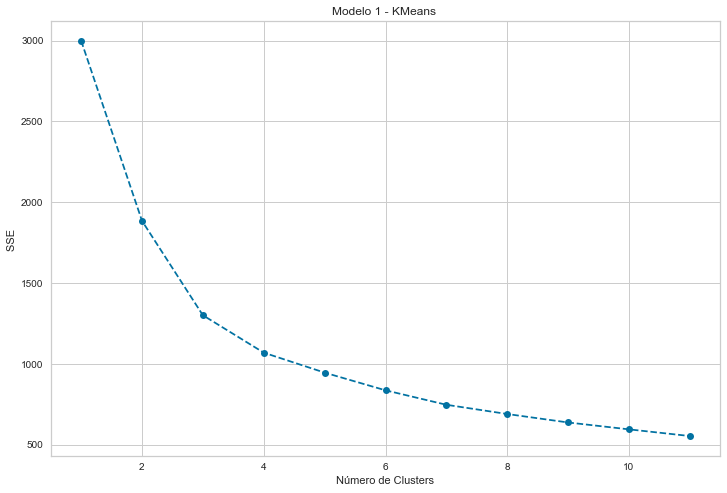

In [201]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 12), sse, marker = 'o', linestyle = '--')
plt.title("Modelo 1 - KMeans ")
plt.xlabel("Número de Clusters")
plt.ylabel("SSE ")
plt.show()

## 5.3.1.2.Definindo melhor número de clusters

In [202]:
k1 = KneeLocator(range(1, 12), sse, curve = 'convex', direction = 'decreasing') 
k1.elbow

3

### Análise e Insights

 - De acordo com o método Elbow acima, o número ideal de clusters é 3.


## 5.3.2.Método Silhouette

## 5.3.2.1.Testando diferentes K's

In [173]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter = 1000,  init = 'random', random_state = 42)
    kmeans.fit(X_numericas)
    score = silhouette_score(X_numericas, kmeans.labels_)
    silhouette_coefficients.append(score)

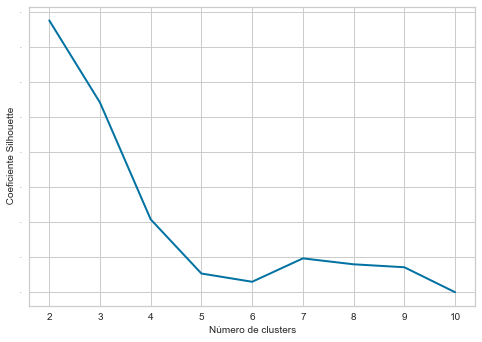

In [174]:
plt.plot(range(2, 11), silhouette_coefficients, linewidth=2)
plt.xticks(range(2, 11), fontsize = 10)
plt.yticks(fontsize = 1)
plt.xlabel("Número de clusters", fontsize = 10)
plt.ylabel(" Coeficiente Silhouette", fontsize = 10)
plt.show()

### Análise e Insights:

 - A definição do número de clusters não é simples, e depende muito de como o time de negócios irá utilizar a solução, então não existe certo e errado
 

 - Analisando o método Elbow e o método Silhouette, o número de clusters ideal é de 3, e como nesse momento, eu sou o "time de negócio", seguirei com esse número.


## 5.4. Avaliação dos clusters

In [204]:
kmeans_model = KMeans(n_clusters=3, max_iter = 1000,init = 'random', random_state = 42)

In [205]:
# Fitting the data with the k-means PCA model
kmeans_model.fit(df)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [206]:
df['clusters'] = kmeans_model.labels_

## 5.5. Salvar o modelo com melhor performance

In [207]:
with open('kmeans_model_dt.pkl', 'wb') as fid:
    cPickle.dump(kmeans_model, fid)

In [208]:
clusters = kmeans_model.fit(df)

In [209]:
# The last column contains the pca k-means clustering labels
df['kmeans_clustes'] = kmeans_model.labels_

In [210]:
df['kmeans_clustes'].value_counts()

0    728
2    216
1     56
Name: kmeans_clustes, dtype: int64

In [211]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,clusters,kmeans_clustes
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,0,0
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,0,0
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,0,0
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,0,0
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,0,0


## 5.6. EDA - Clusters

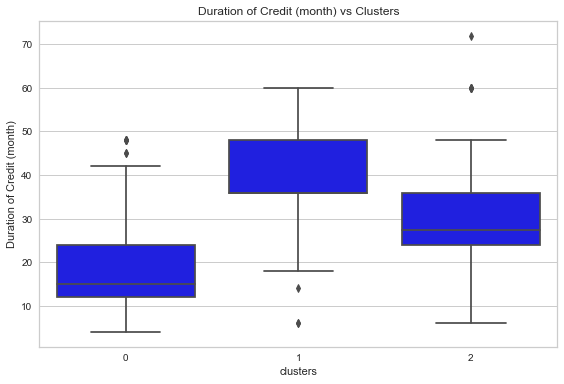

In [214]:
sns.boxplot(x = 'clusters', y = 'Duration of Credit (month)', data  = df, color = 'blue');
plt.title('Duration of Credit (month) vs Clusters')

plt.tight_layout()
plt.show()

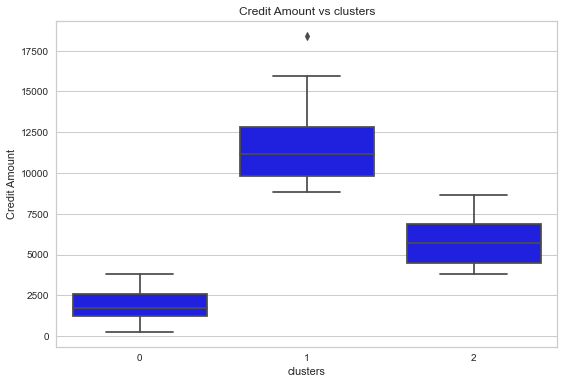

In [215]:
sns.boxplot(x = 'clusters', y = 'Credit Amount', data  = df, color = 'blue');
plt.title('Credit Amount vs clusters')

plt.tight_layout()
plt.show()

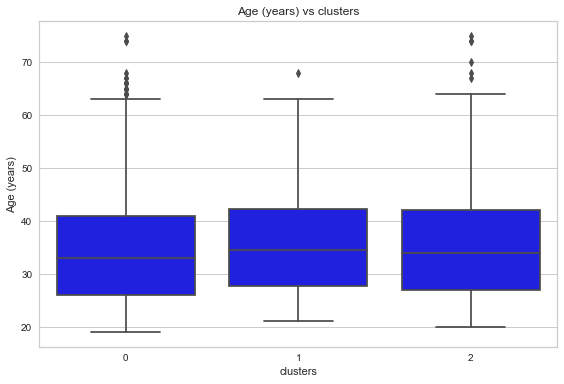

In [216]:
sns.boxplot(x = 'clusters', y = 'Age (years)', data  = df, color = 'blue');
plt.title('Age (years) vs clusters')

plt.tight_layout()
plt.show()

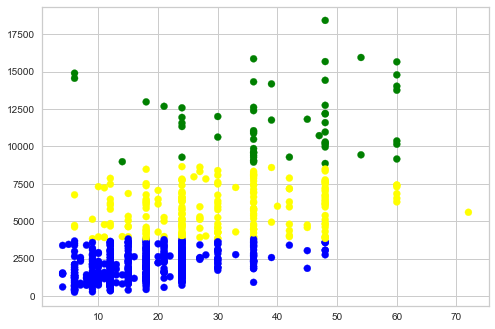

In [217]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'green',2:'yellow',3:'orange'}
ax.scatter(df['Duration of Credit (month)'], df['Credit Amount'], c=df['kmeans_clustes'].apply(lambda x: colors[x]))
plt.show()

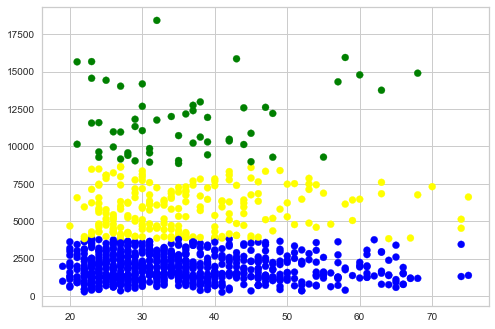

In [218]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'green',2:'yellow',3:'orange'}
ax.scatter(df['Age (years)'], df['Credit Amount'], c=df['kmeans_clustes'].apply(lambda x: colors[x]))
plt.show()

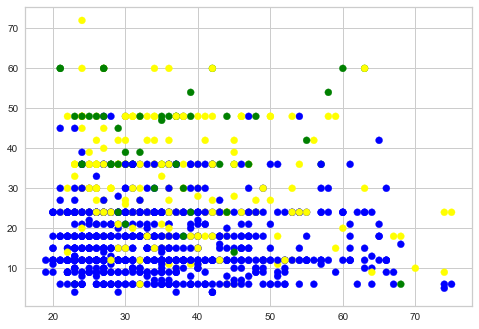

In [219]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'green',2:'yellow',3:'orange'}
ax.scatter(df['Age (years)'], df['Duration of Credit (month)'], c=df['kmeans_clustes'].apply(lambda x: colors[x]))
plt.show()

## 6. Implementação

Para a última etapa do CRISP-DM, foi produzida uma proposta para utilização do modelo de K-means na análise de risco de crédito

* Passo 1. Uso do modelo de K-means para criação dos grupos


* Passo 2. Criar quadro resumo com as principais medidas estatísticas


* Passo 3. Análise exploratória de dados dos grupos


## 6.1.Carregar o modelo 

In [220]:
kmeans_model = joblib.load('kmeans_model_dt.pkl')

## 6.2.Criando a variável clusters

In [221]:
df['clusters'] = kmeans_model.predict(df)
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,clusters,kmeans_clustes
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,0,0
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,0,0
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,0,0
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,0,0
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,21,3,1,1,2,2,1,1,0,0
996,0,1,24,2,0,2303,1,5,4,3,...,45,3,2,1,3,1,1,1,0,0
997,0,4,21,4,0,12680,5,5,4,3,...,30,3,3,1,4,1,2,1,1,1
998,0,2,12,2,3,6468,5,1,2,3,...,52,3,2,1,4,1,2,1,2,2


## 6.3.Criando dataset para uso no resumo da EDA

In [272]:
df_clustered = df[['Duration of Credit (month)','Credit Amount','Age (years)','clusters','Creditability']]

## 6.3.1.Resumo dos clusters

In [273]:
df_clustered.groupby('clusters').mean()

,Duration of Credit (month),Credit Amount,Age (years),Creditability
clusters,,,,
0,16.718407,1890.061813,35.318681,0.741758
1,39.660714,11695.589286,36.053571,0.446429
2,30.143519,5742.268519,36.162037,0.625000


## 6.3.1.1.Estatísticas descritivas dos clusters - Duration of Credit (month)

In [294]:
df_clustered.groupby('clusters').agg(
    min_duration=pd.NamedAgg(column='Duration of Credit (month)', aggfunc=min),
    media_duration=pd.NamedAgg(column='Duration of Credit (month)', aggfunc= 'mean'),
    mediana_duration=pd.NamedAgg(column='Duration of Credit (month)', aggfunc='median'),
    max_duration=pd.NamedAgg(column='Duration of Credit (month)', aggfunc=max))

,min_duration,media_duration,mediana_duration,max_duration
clusters,,,,
0,4,16.718407,15.0,48
1,6,39.660714,36.0,60
2,6,30.143519,27.5,72


## 6.3.1.2.Estatísticas descritivas dos clusters - Credit Amount

In [295]:
df_clustered.groupby('clusters').agg(
    min_credit_amount=pd.NamedAgg(column='Credit Amount', aggfunc=min),
    media_credit_amount=pd.NamedAgg(column='Credit Amount', aggfunc= 'mean'),
    mediana_duration=pd.NamedAgg(column='Credit Amount', aggfunc='median'),
    max_credit_amount=pd.NamedAgg(column='Credit Amount', aggfunc=max))

,min_credit_amount,media_credit_amount,mediana_duration,max_credit_amount
clusters,,,,
0,250,1890.061813,1745.0,3812
1,8858,11695.589286,11191.0,18424
2,3832,5742.268519,5726.5,8648


## 6.3.1.3.Estatísticas descritivas dos clusters - Age (years)

In [296]:
df_clustered.groupby('clusters').agg(
    min_age=pd.NamedAgg(column='Age (years)', aggfunc=min),
    media_age=pd.NamedAgg(column='Age (years)', aggfunc= 'mean'),
    mediana_age=pd.NamedAgg(column='Age (years)', aggfunc='median'),
    max_age=pd.NamedAgg(column='Age (years)', aggfunc=max))

,min_age,media_age,mediana_age,max_age
clusters,,,,
0,19,35.318681,33.0,75
1,21,36.053571,34.5,68
2,20,36.162037,34.0,75


## 6.4. Exportar base com as informações necessárias para o time de negócio

In [65]:
base_clusters = df_clustered
base_clusters

,Duration of Credit (month),Credit Amount,Age (years),clusters,Creditability
0,18,1049,21,1,1
1,9,2799,36,3,1
2,12,841,23,1,1
3,12,2122,39,1,1
4,12,2171,38,1,1
...,...,...,...,...,...
995,24,1987,21,1,0
996,24,2303,45,1,0
997,21,12680,30,0,0
998,12,6468,52,2,0


In [66]:
#Salva a base escorada
path = 'base_clusters_artigo_credit_risk.csv'
base_clusters.to_csv(path, sep = ';', header = True, decimal='.')

## 7. Resumo do projeto e insights gerados

### Análise e Insights:

- O contexto do problema de negócio desse estudo era  gerar insights para a área de negócio. A princípio como o dataset possui a marcação da target, ou seja, foi informado se o crédito concedido no passado foi pago ou não, o mais indicado nesse caso era realizar uma análise do tipo supervisionada, criando um modelo preditivo, como foi feito no projeto anterior (https://github.com/JonnathanMartins/credit_risk_model). Entretanto, no caso em que não temos essa informação, a análise do tipo não supervisionada é útil para gerar insights, como os que serão descritos abaixo:


- De acordo com a metodologia adotada nesse projeto, foram criados três grupos de clientes utilizando o método K-means:
 

- #### O grupo 1:

    A média de idade dos clientes nesse grupo é de 35 anos, e possui a menor média de valor de empréstimo contratado entre os grupos (1890) e com menor média também para duração do pagamento do empréstimo.Esse grupo corresponde a cerca de 72% dos dados observados. Ao adicionar a variável "Creditability", que informa se o crédito foi pago ou não, apresenta a    maior  proporção de bons cientes entre os grupos. Esse grupo de clientes  apresenta o menor risco de crédito, e   novos estudos poderiam ser realizados para oferecerem melhores condições de empréstimos para clientes com esse perfil, como por exemplo: menores taxas de juros e oferta de novos produtos.

        
- #### O grupo 2:

    É composto por clientes com média 36 anos de idade, possui 6 vezes mais o valor da média de empréstimo comparado ao grupo 1 (11.695) e possui  a maior média de duração do pagamento do empréstimo. Esse grupo corresponde em torno de 21% dos dados observados. Ao adicionar a variável "Creditability", apresenta a menor proporção de bons cientes entre os grupos. Em resumo, possivelmente, esse grupo de cliente é o grupo mais arriscado em termo de crédito e devem ser analisados com maior seriedade, pois podem comprometer a carteira de cliente. Uma adequação na política de concessão de crédito para clientes com esse perfil poderia ser feita para favorecer a redução da inadimplência.

      
- #### O grupo 3

    A média de idade dos clientes nesse grupo é de 36 anos, a média do valor de empréstimo desse grupo é de 5.742 , sendo 3 vezes maior que o grupo 1. Apresenta uma média de duração do pagamento do empréstimo próximo ao grupo 2; Esse grupo corresponde cerca de 5% dos dados observados. Ao adicionar a variável "Creditability", apresenta  62% de bons cientes entre os grupos. Esse grupo de clientes apresenta um risco médio para a instituição, e um farol amarelo em relação à inadimplência.
    
    
    
- #### Conclusão

    O estudo com aplicação de uma das técnicas não supervisionado de machine learning, possibilitou gerar insights sobre as caracteríticas dos clientes em relação ao problema de negócio, o risco de crédito, e poderia contribuir com melhores decisões em relação à inadimplência.
        
      
- #### Importante

Modelos não supervisionados, como o realizado nesse estudo, não são desenvolvidos para fazerem previsão, logo os insights gerados nesse estudo servem exclusivamente para busca de conhecimento do perfil do cliente na base em  que o estudo foi realizado. Um modelo preditivo, como os chamados modelos de credit scoring são os indicados para predição.

O output do modelo K-means, ou seja, a variável "clusters" poderia ser utilizada como uma variável explicativa na construção de um modelo preditivo, como uma nova feature, na tentativa de melhor a capacidade preditiva.

 
 
 - #### Sobre o algoritmo K-means 
 
        
   - Deve-se utilizar o K-means somente com variáveis numéricas. 
   
   
   - Esse algoritmo é sensível à escala, pois utiliza medidas de distância, como Distância Euclidiana, logo é importante utilizar algum método de pré-processamento das variáveis, como StandardScaler().
   
   
   - O  K-Means torna-se lento com grande número de observações. 
   
    
   - O método de Clusterização pode ter resultado ruim se os dados tiverem ruídos ou outliers.
   
     
   - Muitos clusters (K) pode diminuir os erros,entretanto pode ter maior risco de overfitting, e até não fazer sentido para o time de negócios, que poderia não conseguir gerar ações estruturadas para todos, e principalmente apurar os resultados.
   
   
   - Por se tratar de uma análise não supervisionada, a quantidade de clusters depende muito mais da necessidade e aplicação pela área de negócio, logo, sempre inicie a construção de um projero de data science com um bom bate-papo com o time de negócios, e incorpore uma criança de 5 anos, seja curioso, faça muitas perguntas :)
   

   - Como vantagem, a clusterização não precisa de dados previamente classificados
